In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('abominable-illustrations.csv', sep='\t')

In [3]:
df['c'] = 1
gb = pd.DataFrame(df.groupby(['type', 'chapter'])['c'].sum())
gb.reset_index(inplace=True)
gb

,type,chapter,c
0,illustration,1,3
1,illustration,2,2
2,illustration,3,4
3,illustration,4,8
4,illustration,5,26
5,illustration,6,6
6,illustration,7,1
7,photograph,1,3
8,photograph,2,6
9,photograph,3,5


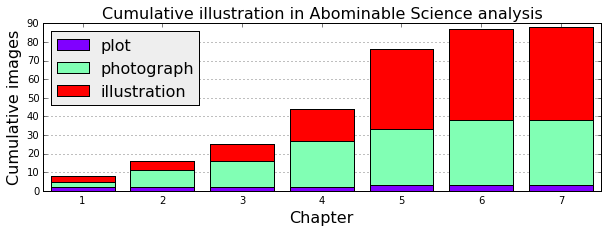

In [23]:
plt.figure(figsize=(10,3))
chapters = np.arange(gb['chapter'].max())
types = set(gb['type'])
colors = cm.rainbow(np.linspace(0, 1, len(types)))

cumsum = np.zeros(len(chapters))
for i, t in enumerate(types):
    dft = gb[gb['type']==t]
    y = np.zeros(len(chapters))
    for r in dft.index:
        row = dft.ix[r]
        y[row.chapter-1] = row.c
    yy = y.cumsum()
    x = np.arange(len(yy))
    p1 = plt.bar(x + 0.6, yy, color=colors[i], bottom=cumsum, zorder=3)
    cumsum += yy
l = plt.legend(types, fontsize=16, loc=2, )
l.set_zorder(4)
l.get_frame().set_facecolor('#eeeeee')
plt.xlabel('Chapter', fontsize=16)
plt.ylabel('Cumulative images', fontsize=16)
plt.title('Cumulative illustration in Abominable Science analysis', fontsize=16)
plt.xlim(0.5, 7.5)
plt.gca().yaxis.grid(True, zorder=0)
plt.savefig('daniel.png',bbox_inches='tight')
plt.show()